In [7]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

names = ['Bandarban_C10']
df = pd.read_csv('CsvFiles/'+names[0]+'.csv')
df.dropna(how = 'all')
print(df.head())
print(df.columns)
print(len(df.columns))

   ZL   UZ  UN_WA  MZ_MH  Vill  RMO     Administrative_Unit  \
0   3  NaN    NaN    NaN   NaN  NaN    Bandarban Zila Total   
1   3  NaN    NaN    NaN   NaN  1.0          Bandarban Zila   
2   3  NaN    NaN    NaN   NaN  2.0          Bandarban Zila   
3   3  NaN    NaN    NaN   NaN  3.0          Bandarban Zila   
4   3  4.0    NaN    NaN   NaN  NaN  Alikadam Upazila Total   

   7+_NotAttendingSchool_Both  7+_NotAttendingSchool_Male  \
0                    153314.0                     72952.0   
1                    128460.0                     61417.0   
2                     11255.0                      5163.0   
3                     13599.0                      6372.0   
4                     20872.0                     10032.0   

   7+_NotAttendingSchool_Female  7+_Employed_Male  7+_Employed_Female  \
0                       80362.0           59182.0             21979.0   
1                       67043.0           50501.0             20199.0   
2                        6092.0    

153314.0
0.523081069274 0.504067397117


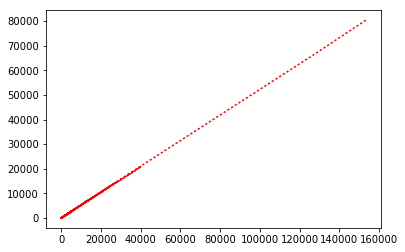

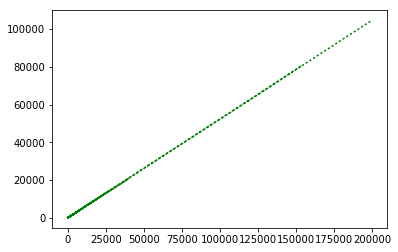

In [64]:
import itertools
def linear_regression(X, Y):
    numerator = 0.0
    avgx = np.mean(X)
    avgy = np.mean(Y)
    denominator = 0.0
    for (x,y) in zip(X, Y):
        dx = x-avgx
        dy = y-avgy
        numerator += dx*dy
        denominator += dx*dx
    if denominator < 1e-9:
        return (1, avgy-avgx)
    m = numerator/denominator
    b = avgy-m*avgx
    return (m, b)

a = '7+_NotAttendingSchool_Both'
b = '7+_NotAttendingSchool_Female'
data = pd.DataFrame()
data[a] = df[a]
data[b] = df[b]
data = data.dropna(how='any')
X, Y = data[a].values.tolist(), data[b].values.tolist()
#df.plot(x = a, y = b, kind='scatter')
#df.plot(x = a, y = b, kind = 'line')
#plt.show()
#X = [2,3]
#Y = [1,6]
print(max(X))
(m, b) = linear_regression(X, Y)
print(m, b)
predict = m*200000+b
plt.plot(X, Y, 'r:')
plt.show()
X.append(200000.0)
Y.append(predict)
plt.plot(X, Y, 'g:')
plt.show()